## Exploratory Data Analysis:
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [1]:
# Import Pandas with the pd alias.
import pandas as pd

# Import Numpy with the np alias.
import numpy as np

# Import pyplot module in mathplot with the plt alias.
import matplotlib.pyplot as plt

# Import Seaborn with the sns alias.
import seaborn as sns

# Import winsorize function from SciPY module
from scipy.stats.mstats import winsorize

In [2]:
# Reading the .csv into DataFrame
# Link to DataSet: https://raw.githubusercontent.com/NikunjKunduru/Covid19-Data-Analysis/main/covid_19_data.csv

dataframe = pd.read_csv("https://raw.githubusercontent.com/NikunjKunduru/Covid19-Data-Analysis/main/covid_19_data.csv")
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# First 5 rows
dataframe.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# Finding the columns in the dataset
dataframe.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
# Last 5 rows
dataframe.tail(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [6]:
# Finding the dimesions of the dataset 
dimensions = dataframe.shape

# rows,colums
rows, columns = dimensions[0], dimensions[1]
print("rows: {0} \ncolumns: {1}".format(rows, columns))

rows: 306429 
columns: 8


In [7]:
# Overall statistical info about the dataset
dataframe.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [8]:
# Checking index dtype, column dtypes, non-null values and memory usage
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


## Data pre-processing:
Data preprocessing is a data mining technique which is used to remove data flaws and transform the raw data in a useful and efficient format. 

Possible dataflaws could be:

* Empty cells
* unwanted data
* Duplicates

In [9]:
# Counting Empty cells
no_of_missing_values = dataframe.isnull().sum()
total_missing_values = no_of_missing_values.sum()

print(no_of_missing_values)
print("\n\nTotal missing values in the dataset {0}".format(total_missing_values))

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


Total missing values in the dataset 78100


Observation: There are 78100 missing values in column province/State. Since the data is string it is ideal to remove the null values.

In [10]:
# Removing rows that have one or many missing values
new_dataframe = dataframe.dropna(axis=0, how='any', inplace=False)

In [11]:
# Removing column with S No
new_dataframe = new_dataframe.drop("SNo",axis=1)

In [12]:
# !!!!!! Ignore this !!!!!!

# Normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

new_dataframe[["Confirmed", "Deaths", "Recovered"]] = min_max_scaler.fit_transform(new_dataframe[["Confirmed", "Deaths", "Recovered"]])

In [13]:
# Winsorization - limit data based on boundaries measured in percentile. [lower_bound = x, upper_bound = 1-y]
new_dataframe["Confirmed"] = winsorize(new_dataframe["Confirmed"], (0.01,0.14))
new_dataframe["Deaths"] = winsorize(new_dataframe["Deaths"], (0.01,0.135))
new_dataframe["Recovered"] = winsorize(new_dataframe["Recovered"], (0.01,0.146))

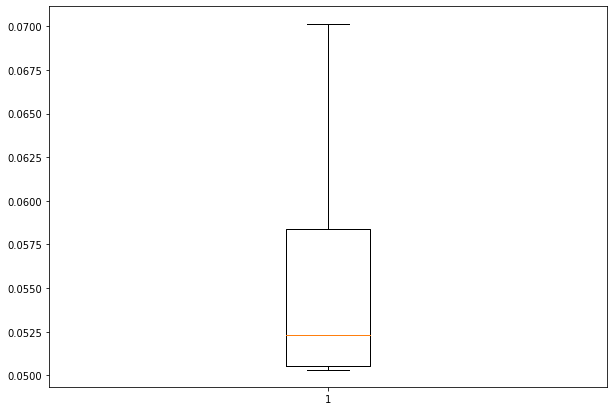

In [14]:
# Box Plot
fig = plt.figure(figsize =(10, 7))
plt.boxplot(new_dataframe["Confirmed"])
plt.show()

In [15]:
# Finding the dimesions of the dataset 
dimensions = dataframe.shape
new_dimensions = new_dataframe.shape

# rows,colums
rows, columns = dimensions[0], dimensions[1]
new_rows, new_columns = new_dimensions[0], new_dimensions[1]

print("!! Actual DataFrame !!")
print("rows: {0} \ncolumns: {1}".format(rows, columns))

print("\n")

print("!! Modified DataFrame !!")
print("rows: {0} \ncolumns: {1}".format(new_rows, new_columns))

!! Actual DataFrame !!
rows: 306429 
columns: 8


!! Modified DataFrame !!
rows: 228329 
columns: 7


Observation: From actual dataframe (306429 - 228329) 78100 rows have been removed and also 1 column with name 'SNo'

In [16]:
# Checking if there are any duplicate values
new_dataframe.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Length: 228329, dtype: bool

Observation: There are no duplicate values in the dataset

## Statistical Data Analysis:
For this analysis, there are five to choose from: mean, median, mode, standard deviation, variance.

In [ ]:
# Calculating Mean for numerical columns
new_dataframe.mean(axis = 0)

SNo          158730.721074
Confirmed     32967.606038
Deaths          916.233422
Recovered     10526.514464
dtype: float64

In [17]:
# Calculating Median for numerical columns
new_dataframe.median()

Confirmed    0.052293
Deaths       0.003660
Recovered    0.117952
dtype: float64

In [18]:
# Calculating Mode for the numerical columns
mode = new_dataframe.mode(axis=0, numeric_only = False)

mode[0:1]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/03/2021,Unknown,Russia,2021-04-02 15:13:53,0.070151,0.032506,0.117785


In [19]:
# Standard Deviation
standard_deviation = new_dataframe.std()
print(standard_deviation)

Confirmed    0.007019
Deaths       0.011055
Recovered    0.002117
dtype: float64


In [20]:
# Finding variance
variance = standard_deviation**2
print(variance)

Confirmed    0.000049
Deaths       0.000122
Recovered    0.000004
dtype: float64


## Encoding:


*   **Label Encoding** is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
*   **One-Hot Encoding** simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.




In [21]:
# Finding how many string and non-string columns
count = 0
for column in new_dataframe.columns:
  if new_dataframe[column].dtype == "object":
    count += 1
print("No of columns with string dtypes: ", count)

nonStringColumns = len(new_dataframe.columns) - count 
print("No of columns with non string dtypes: ", nonStringColumns)

No of columns with string dtypes:  4
No of columns with non string dtypes:  3


In [ ]:
# Lable Encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

new_dataframe['ObservationDate'] = label_encoder.fit_transform(new_dataframe['ObservationDate'])
new_dataframe['Province/State'] = label_encoder.fit_transform(new_dataframe['Province/State'])
new_dataframe['Country/Region'] = label_encoder.fit_transform(new_dataframe['Country/Region'])
new_dataframe['Last Update'] = label_encoder.fit_transform(new_dataframe['Last Update'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
new_dataframe.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,21,24,19,0,1.0,0.0,0.0
1,2,21,60,19,0,14.0,0.0,0.0
2,3,21,124,19,0,6.0,0.0,0.0
3,4,21,194,19,0,1.0,0.0,0.0
4,5,21,200,19,0,0.0,0.0,0.0


In [ ]:
# One-Hot Encoding
df_oencoded = pd.get_dummies(data = new_dataframe, drop_first = True)
df_oencoded

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,21,24,19,0,0.050339,0.001581,0.117785
1,21,60,19,0,0.050342,0.001581,0.117785
2,21,124,19,0,0.050340,0.001581,0.117785
3,21,194,19,0,0.050339,0.001581,0.117785
4,21,200,19,0,0.050339,0.001581,0.117785
...,...,...,...,...,...,...,...
306424,277,732,31,1366,0.067400,0.022325,0.123473
306425,277,733,21,1366,0.055184,0.003758,0.117785
306426,277,734,19,1366,0.050566,0.001590,0.117968
306427,277,735,31,1366,0.064892,0.017022,0.123473


## Data Visualization:
Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals.

*   Box-Plot
*   Voilin Plot
*   Histogram
*   Scatter Plot
*   Line Plot

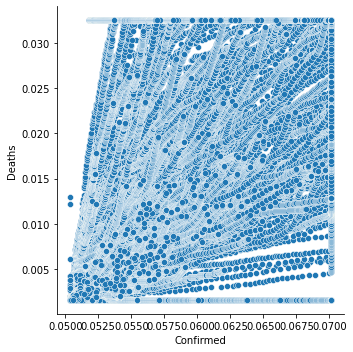

In [ ]:
sns.relplot(x="Confirmed",y="Deaths",data=new_dataframe)

Observation: From this we can infer that confirmed cases and Deaths are positively correlated each line represent relation between confrmed and death cases for the diffrent days

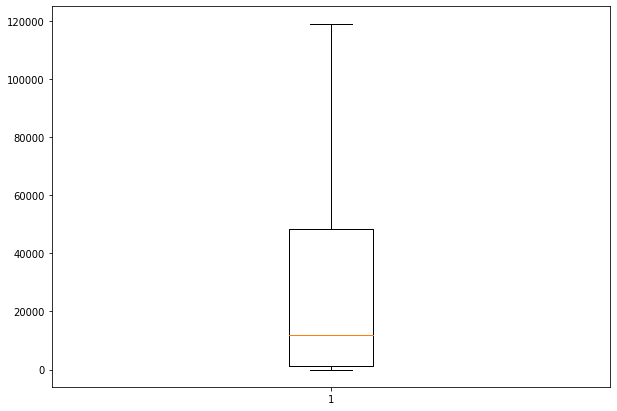

In [ ]:
# Box Plot
fig = plt.figure(figsize =(10, 7))
plt.boxplot(new_dataframe["Confirmed"])
plt.show()

Observation: 5 points can be found out min, 1st quartile, median, 3rd quartile, max

In [ ]:
new_dataframe

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,21,24,19,0,0.050339,0.001581,0.117785
1,21,60,19,0,0.050342,0.001581,0.117785
2,21,124,19,0,0.050340,0.001581,0.117785
3,21,194,19,0,0.050339,0.001581,0.117785
4,21,200,19,0,0.050339,0.001581,0.117785
...,...,...,...,...,...,...,...
306424,277,732,31,1366,0.067400,0.022325,0.123473
306425,277,733,21,1366,0.055184,0.003758,0.117785
306426,277,734,19,1366,0.050566,0.001590,0.117968
306427,277,735,31,1366,0.064892,0.017022,0.123473


Text(0, 0.5, 'total cases confirmed')

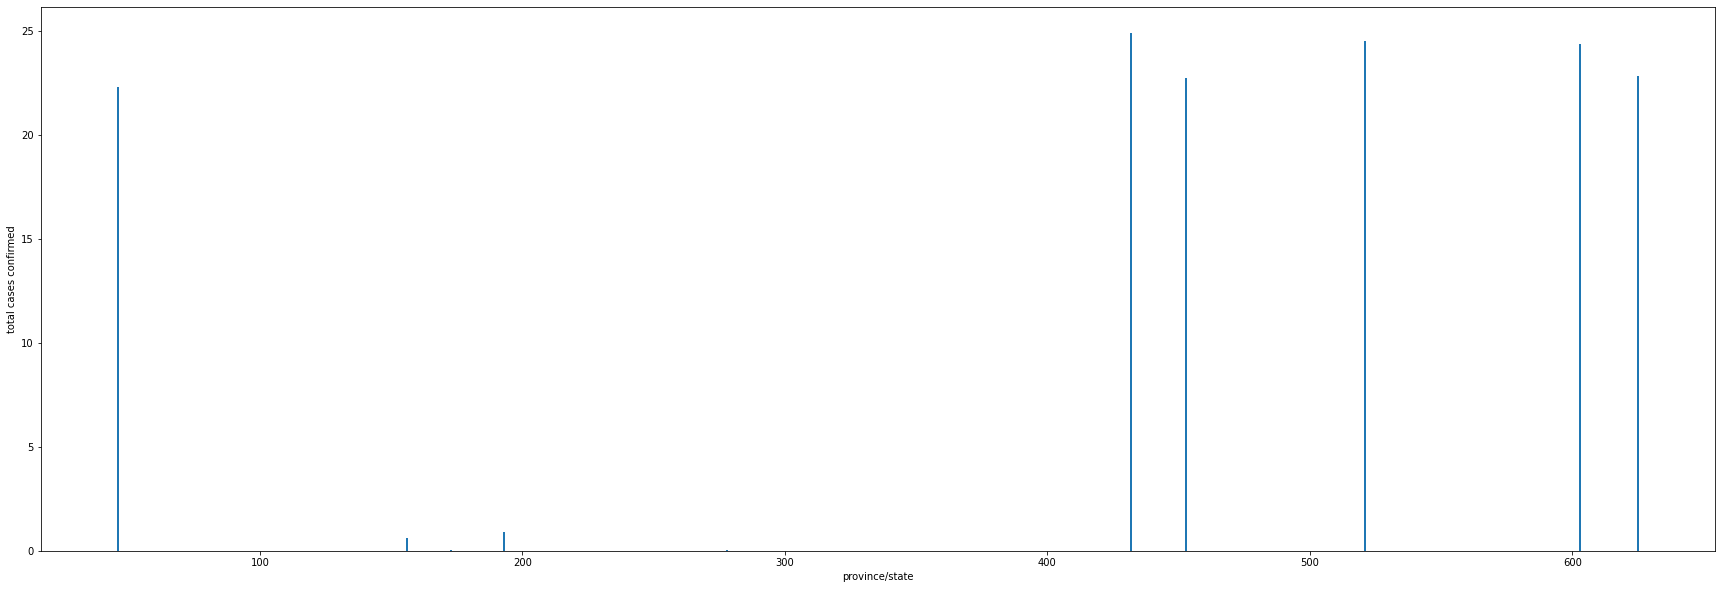

In [ ]:
#Bar plot
plt.figure(figsize=[30,10])
gf=new_dataframe.groupby(["Country/Region","Province/State"],as_index=False)['Confirmed'].sum()
df=gf.iloc[:10,:]
x=df["Province/State"]
y=df["Confirmed"]
plt.bar(x,y)
plt.xlabel("province/state")
plt.ylabel("total cases confirmed")


Text(0, 0.5, 'Confirmedcases')

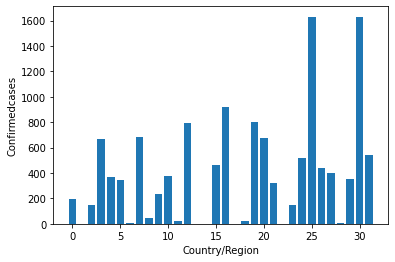

In [ ]:
df=new_dataframe
lf=df.groupby("Country/Region",as_index=False)["Confirmed"].sum()
x=lf["Country/Region"]
y=lf["Confirmed"]
plt.bar(x,y)
plt.xlabel("Country/Region")
plt.ylabel("Confirmedcases")


Observation: 

Text(0, 0.5, 'Frequency of the confirmed cases')

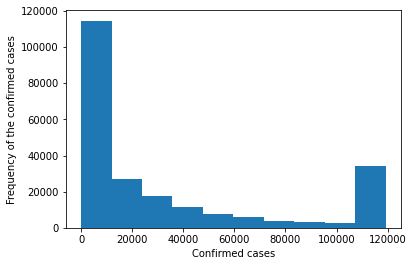

In [ ]:
# Histogram
x=new_dataframe["Confirmed"]
plt.hist(x)
plt.xlabel("Confirmed cases")
plt.ylabel("Frequency of the confirmed cases")


Fro this we can infer that every day the cases recording are high in between min-max scale value 0.051 to 0.0525 

(array([125873.,  22463.,  13538.,   8958.,   7196.,   5650.,   4518.,
          3675.,   3202.,  33256.]),
 array([   0. ,  348.1,  696.2, 1044.3, 1392.4, 1740.5, 2088.6, 2436.7,
        2784.8, 3132.9, 3481. ]),
 <a list of 10 Patch objects>)

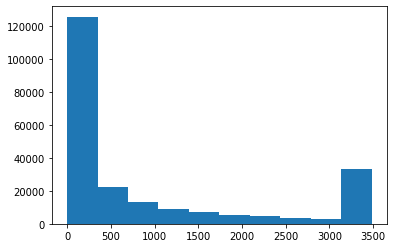

In [ ]:
x=new_dataframe["Deaths"]
plt.hist(x)

Observation: 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


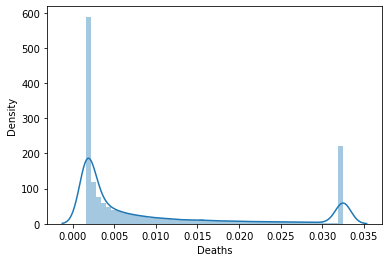

In [ ]:
sns.distplot(new_dataframe.Deaths)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


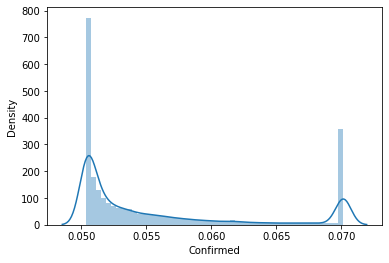

In [ ]:
sns.distplot(new_dataframe.Confirmed)

Observation: 

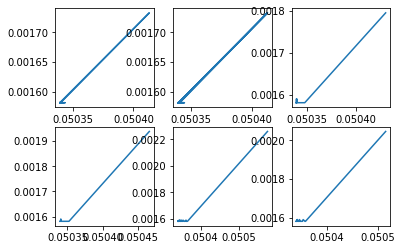

In [ ]:
x = new_dataframe.loc[21,"Confirmed"]
y = new_dataframe.loc[21,"Deaths"]
plt.subplot(2,3,1)
plt.plot(x,y)

x = new_dataframe.loc[23,"Confirmed"]
y = new_dataframe.loc[23,"Deaths"]
plt.subplot(2,3,2)
plt.plot(x,y)

x = new_dataframe.loc[25,"Confirmed"]
y = new_dataframe.loc[25,"Deaths"]
plt.subplot(2,3,3)
plt.plot(x,y)

x = new_dataframe.loc[27,"Confirmed"]
y = new_dataframe.loc[27,"Deaths"]
plt.subplot(2,3,4)
plt.plot(x,y)

x = new_dataframe.loc[31,"Confirmed"]
y = new_dataframe.loc[31,"Deaths"]
plt.subplot(2,3,5)
plt.plot(x,y)

x = new_dataframe.loc[29,"Confirmed"]
y = new_dataframe.loc[29,"Deaths"]
plt.subplot(2,3,6)
plt.plot(x,y)

In [ ]:
sd=new_dataframe.groupby("ObservationDate",as_index=False)["Confirmed"].sum()
sd=sd.iloc[:,:]
sd

,ObservationDate,Confirmed
0,01/01/2021,58978033.0
1,01/02/2021,59484118.0
2,01/03/2021,59884700.0
3,01/04/2021,60289083.0
4,01/05/2021,60833257.0
...,...,...
489,12/27/2020,56705890.0
490,12/28/2020,57076708.0
491,12/29/2020,57570737.0
492,12/30/2020,58113454.0


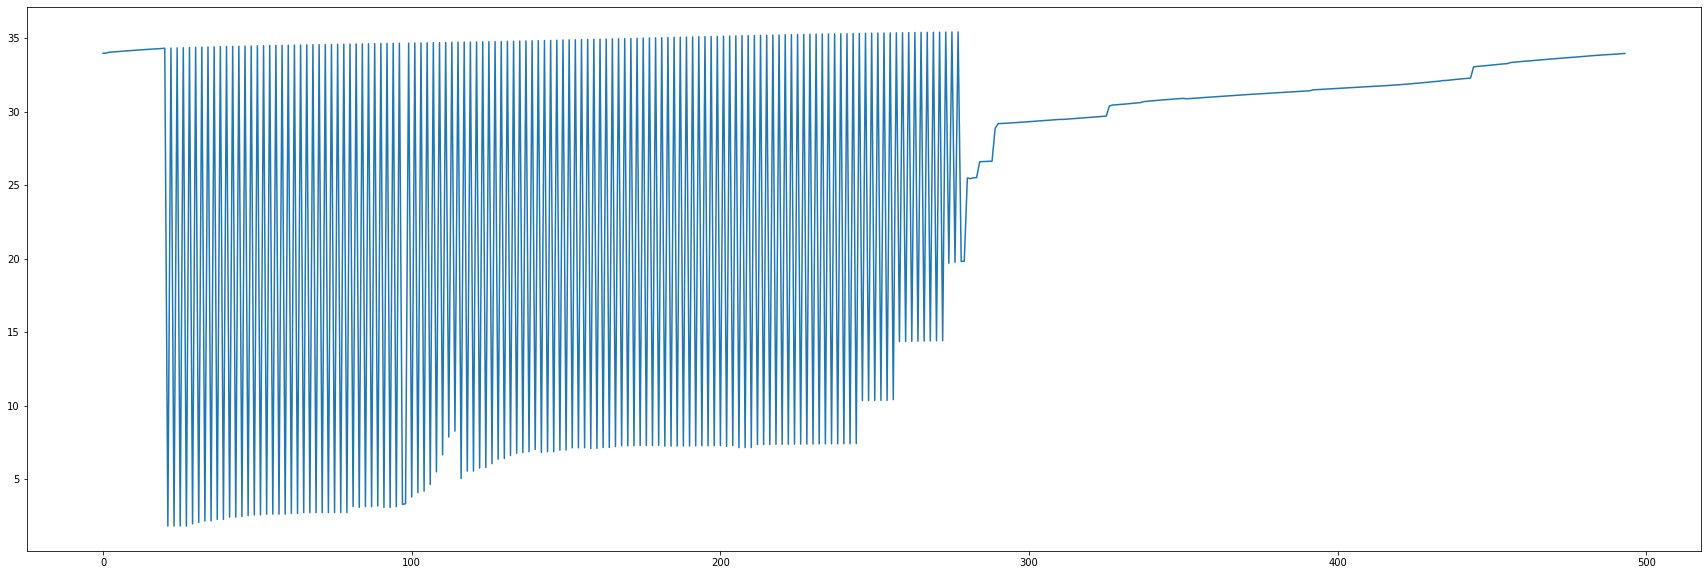

In [ ]:
plt.figure(figsize=[30,10])
x=sd["ObservationDate"]
y=sd["Confirmed"]
plt.plot(x,y)

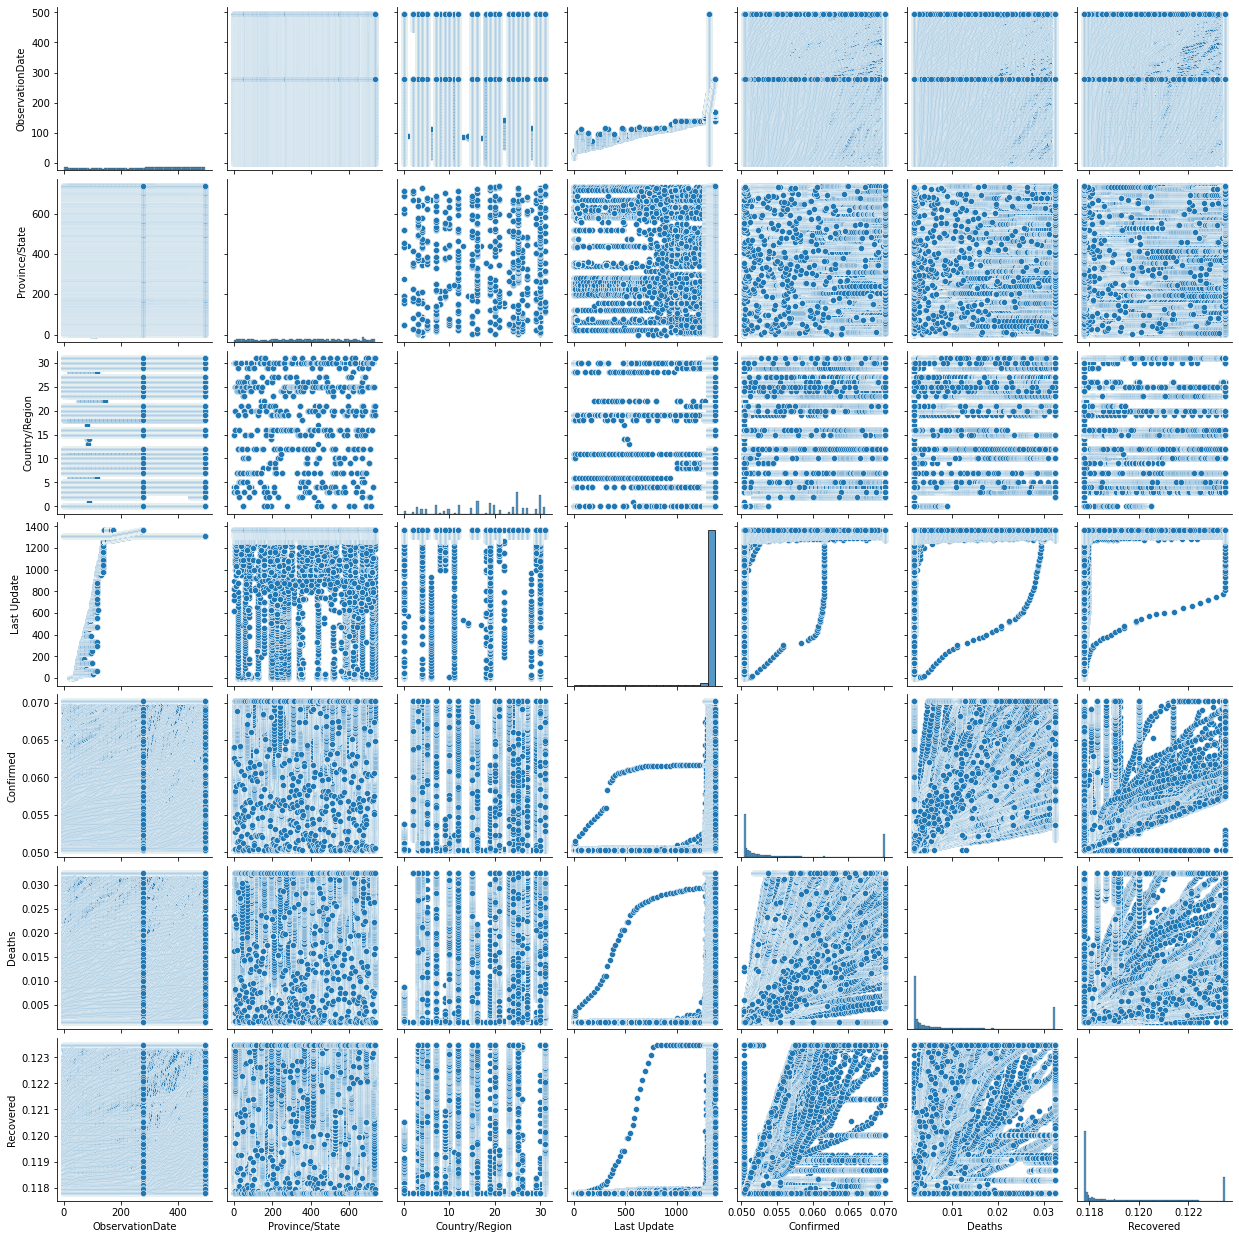

In [ ]:
sns.pairplot(new_dataframe)

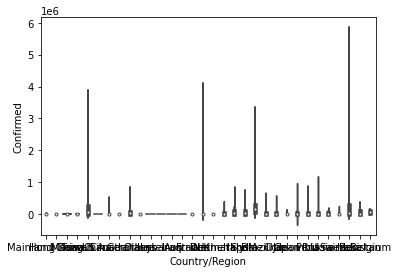

In [ ]:
sns.violinplot(x="Country/Region",y="Confirmed",data=new_dataframe)